In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 109)
import matplotlib.dates as md
import datetime as dt
import seaborn as sns

In [2]:
df = pd.read_csv('data/export.csv.csv')
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.00,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.50,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,89.25,74,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92.5,6,253.00,61,1,5,4,0,1,6,0,73,5,5,60,0.136601,0.0,0.088670,15.726712,177.362361,4.433040,-0.350361,2.816667,212.834

In [3]:
sm_df = pd.read_excel('data/store_master.xlsx')
sm_df.head(2)

,DIV,STORE,OPEN_DATE,CLOSE_DATE,STORE_STATE,STORE_ZIP,STORE_CITY,GROSS_FEET,CLASS,RPTCODE,VOLUME_BAND
0,7,1504,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2
1,7,1505,29-MAY-84,NaN,CA,92626,COSTA MESA,1876,Mall,S,5


### MAPPED RELEVANT COLUMNS FROM SM_DF TO DF

In [4]:
mapping1 = dict(sm_df[['STORE', 'STORE_CITY']].values)
df['STORE_CITY'] = df.STORE.map(mapping1)
df.head(2)

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.0,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.25000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.5,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.94149,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS


In [5]:
mapping2 = dict(sm_df[['STORE', 'CLASS']].values)
df['CLASS'] = df.STORE.map(mapping2)
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.00,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.50,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,89.25,74,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92.5,6,253.00,61,1,5,4,0,1,6,0,73,5,5,60,0.136601,0.0,0.0

In [6]:
mapping3 = dict(sm_df[['STORE', 'CLOSE_DATE']].values)
df['CLOSE_DATE'] = df.STORE.map(mapping3)
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.00,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.50,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,89.25,74,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92.5,6,253.00,61,1,5,4,0,1,6,0,73,

In [7]:
mapping4 = dict(sm_df[['STORE', 'GROSS_FEET']].values)
df['GROSS_FEET'] = df.STORE.map(mapping4)
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.00,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN,1849
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.50,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN,1849
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,89.25,74,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN,1849
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92.5,6,2

In [8]:
mapping5 = dict(sm_df[['STORE', 'OPEN_DATE']].values)
df['OPEN_DATE'] = df.STORE.map(mapping5)
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.00,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN,1849,01-MAY-12
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.50,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN,1849,01-MAY-12
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,89.25,74,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN,1849,01-MAY-12
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00

In [9]:
mapping6 = dict(sm_df[['STORE', 'VOLUME_BAND']].values)
df['VOLUME_BAND'] = df.STORE.map(mapping6)
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,...,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,...,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,...,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92

### INDENTIFY AND REMOVE ANY OUTLIERS

In [10]:
df.COMP_PCT.nlargest(10)

26686    245.175193
10491     20.424050
457        7.945772
8460       6.630358
7530       5.554588
2526       5.506788
9550       4.245985
21338      3.803657
2525       3.721613
12971      3.540078
Name: COMP_PCT, dtype: float64

In [11]:
df1 = df.loc[(df.COMP_PCT != 245.175193) & (df.COMP_PCT != 20.424050) & (df.COMP_PCT != 7.945772) & (df.COMP_PCT != 6.630358) & (df.COMP_PCT != 5.554588)] 
                
df1

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.00,192,7,1168,186.88,22003.18,114,51,105,121,0.73910,0.86780,0.80350,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.00,2,61.50,13,2323.95,83,5709.92,4,192.00,24,1365.15,31,223.00,6,...,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.000000,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.00,181,7,891,180.31,17499.86,94,33,74,94,0.51560,0.78720,0.65140,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.80,2,45.00,11,2550.00,76,4994.86,2,94.00,9,511.97,38,192.00,7,...,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.000000,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.00,183,7,930,182.23,15004.60,79,39,65,78,0.69640,0.83330,0.76490,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.60,4,109.50,3,455.99,52,3507.96,2,117.00,9,549.70,49,249.00,2,...,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.000000,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.00,183,7,812,183.17,12770.59,72,34,56,72,0.50750,0.77780,0.64260,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.70,0,0.

In [12]:
df1.COMP_PCT.max()

5.506787999999999

In [13]:
df2 = df1.query('COMP_PCT != "5.506787999999999"') #& (df1.COMP_PCT != 4.245985) & (df1.COMP_PCT != 3.803657) & (df1.COMP_PCT != 3.721613)]
df2.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,...,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,...,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,...,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92

In [14]:
df2.COMP_PCT.max()

4.245985

In [15]:
df2 = df2.query('COMP_PCT != "4.245985"') #& (df1.COMP_PCT != 4.245985) & (df1.COMP_PCT != 3.803657) & (df1.COMP_PCT != 3.721613)]
df2.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,...,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,...,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,...,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92

In [16]:
df2.COMP_PCT.max()

3.803657

In [17]:
df = df2.query('COMP_PCT != "3.803657"')
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,...,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,...,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,...,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92

In [18]:
df3 = df2.query('COMP_PCT != "3.721613"')
df3.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,...,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,...,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,...,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92

### SET ARBITRARY LIMITS FOR WHAT MIGHT CONSTITUTE A SUCCESSFUL STORE

In [19]:
df_filter = df3.loc[(df3['COMP_PCT'] > .5) & (df3["STRAK_COMP_TRAFFIC_DELTA"] > 0)  
                   & (df3["SALES_AMT_PER_PAY_HOUR"] > 150)
                & (df3['CLOSE_DATE'] != "NaN")
                & (df3['PAYROLL_PCT'] < .1 )
                & (df3['SALES_AMT_TY'] > 20000)]
df_filter.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
773,7,1521,11-NOV-17,2018,41,10,24935.12,10227.25,1.438106,2017,41,10,12-NOV-16,856.10,962.61,117,7,804,120.92,24935.12,104,65,111,119,0.61321,0.93277,0.77299,106,3051.38,255,24935.12,88,15848.73,41,7446.96,120.91,2493.43,167,9086.39,67,758.40,2,47.0,10,3919.00,29,2160.00,4,167.99,31,1874.50,24,159.50,0,...,6,9,6,0,3,1,0,110,9,9,88,0.034333,0.094122,0.129353,31.013831,239.760769,6.649024,1.308753,2.897727,283.353636,0.465909,0.122373,0.345098,0.654902,0.010227,180.099205,54.409521,0.635599,0.364401,0.469877,0.099997,20.622198,206.228765,1,9213,9213.0,1,3936,3936.0,0,0,0.0,1,362,362.00,3,13511,4504,BOCA RATON,Mall,NaN,2302,29-MAY-84,3
789,7,1521,10-MAR-18,2019,5,2,25110.40,15673.74,0.602068,2018,6,2,11-MAR-17,1770.55,1074.34,109,7,832,108.81,25110.40,127,83,139,152,0.63359,0.91447,0.77403,131,4368.14,352,25110.40,107,16587.06,59,9085.51,108.81,2106.62,245,8523.34,86,938.00,10,227.0,5,766.00,62,4182.35,2,74.01,35,2043.48,45,292.50,0,...,10,16,9,1,6,1,0,137,16,16,100,0.070511,0.068544,0.152644,30.180769,197.719685,7.646356,0.449424,3.520000,251.104000,0.551402,0.173957,0.303977,0.696023,0.014018,155.019252,34.789143,0.660565,0.339435,0.547747,0.083894,19.360537,230.772907,1,9332,9332.0,1,4055,4055.0,0,0,0.0,2,596,298.00,4,13983,3496,BOCA RATON,Mall,NaN,2302,29-MAY-84,3
833,7,1521,26-JAN-19,2019,51,12,24603.51,14623.74,0.682436,2018,52,12,27-JAN-18,910.15,1461.91,103,7,1115,103.02,24603.51,142,94,142,171,0.67626,0.83041,0.75333,139,3968.41,282,24603.51,109,16365.98,42,6518.49,103.04,2459.32,173,8237.53,46,466.39,3,64.0,9,3783.46,21,1397.71,3,85.99,31,1944.99,59,427.00,0,...,10,21,15,1,5,2,0,152,21,21,109,0.036993,0.099968,0.127354,22.065928,173.264155,10.823141,0.555082,2.587156,225.720275,0.385321,0.161294,0.386525,0.613475,0.011462,150.146606,47.615780,0.665189,0.334811,0.398295,0.099958,23.867624,238.776300,1,9654,9654.0,1,4377,4377.0,0,0,0.0,1,176,176.00,3,14207,4736,BOCA RATON,Mall,NaN,2302,29-MAY-84,3
1324,7,1547,04-NOV-17,2018,40,10,40884.37,25397.66,0.609769,2017,40,10,05-NOV-16,1400.09,1420.21,188,7,2204,193.42,40884.37,224,141,198,256,0.65581,0.77344,0.71463

### FIND STORES WITH AT LEAST ONE YEAR OF EXISTENCE

In [20]:
stores = df_filter[
     (df_filter.FISCAL_YEAR.isin([2017, 2018, 2019, 2020]))]
stores

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
773,7,1521,11-NOV-17,2018,41,10,24935.12,10227.25,1.438106,2017,41,10,12-NOV-16,856.10,962.61,117,7,804,120.92,24935.12,104,65,111,119,0.61321,0.93277,0.77299,106,3051.38,255,24935.12,88,15848.73,41,7446.96,120.91,2493.43,167,9086.39,67,758.40,2,47.00,10,3919.00,29,2160.00,4,167.99,31,1874.50,24,159.50,0,...,6,9,6,0,3,1,0,110,9,9,88,0.034333,0.094122,0.129353,31.013831,239.760769,6.649024,1.308753,2.897727,283.353636,0.465909,0.122373,0.345098,0.654902,0.010227,180.099205,54.409521,0.635599,0.364401,0.469877,0.099997,20.622198,206.228765,1,9213,9213.0,1,3936,3936.0,0,0,0.0,1,362,362.00,3,13511,4504,BOCA RATON,Mall,NaN,2302,29-MAY-84,3
789,7,1521,10-MAR-18,2019,5,2,25110.40,15673.74,0.602068,2018,6,2,11-MAR-17,1770.55,1074.34,109,7,832,108.81,25110.40,127,83,139,152,0.63359,0.91447,0.77403,131,4368.14,352,25110.40,107,16587.06,59,9085.51,108.81,2106.62,245,8523.34,86,938.00,10,227.00,5,766.00,62,4182.35,2,74.01,35,2043.48,45,292.50,0,...,10,16,9,1,6,1,0,137,16,16,100,0.070511,0.068544,0.152644,30.180769,197.719685,7.646356,0.449424,3.520000,251.104000,0.551402,0.173957,0.303977,0.696023,0.014018,155.019252,34.789143,0.660565,0.339435,0.547747,0.083894,19.360537,230.772907,1,9332,9332.0,1,4055,4055.0,0,0,0.0,2,596,298.00,4,13983,3496,BOCA RATON,Mall,NaN,2302,29-MAY-84,3
833,7,1521,26-JAN-19,2019,51,12,24603.51,14623.74,0.682436,2018,52,12,27-JAN-18,910.15,1461.91,103,7,1115,103.02,24603.51,142,94,142,171,0.67626,0.83041,0.75333,139,3968.41,282,24603.51,109,16365.98,42,6518.49,103.04,2459.32,173,8237.53,46,466.39,3,64.00,9,3783.46,21,1397.71,3,85.99,31,1944.99,59,427.00,0,...,10,21,15,1,5,2,0,152,21,21,109,0.036993,0.099968,0.127354,22.065928,173.264155,10.823141,0.555082,2.587156,225.720275,0.385321,0.161294,0.386525,0.613475,0.011462,150.146606,47.615780,0.665189,0.334811,0.398295,0.099958,23.867624,238.776300,1,9654,9654.0,1,4377,4377.0,0,0,0.0,1,176,176.00,3,14207,4736,BOCA RATON,Mall,NaN,2302,29-MAY-84,3
1324,7,1547,04-NOV-17,2018,40,10,40884.37,25397.66,0.609769,2017,40,10,05-NOV-16,1400.09,1420.21,188,7,2204,193.42,40884.37,224,141,198,256,0.65581,0.77344,0.71

In [21]:
stores.STORE.value_counts().nlargest(10)

1662    10
1649     5
1718     5
2046     5
2019     4
1722     4
1724     4
1823     4
2009     3
2085     3
Name: STORE, dtype: int64

### GROUP DF BY 'FISCAL_YEAR' AND 'STORE'

In [22]:
fiscal_gb = stores.groupby(['FISCAL_YEAR', 'STORE']).agg({'COMP_PCT': 'mean', 'CLASS': 'max', 'PAYROLL_PCT': 'mean', 'FISCAL_MONTH': 'max',
                                       'STRAK_COMP_TRAFFIC_DELTA': 'mean', 'DOLLAR_PER_TRANS': 'mean', 'STRAK_CONVERSION_PCT': 'mean',
                                       'SALES_AMT_PER_PAY_HOUR':'mean', 'AVG_PAY_PER_HR': 'mean', 
                                        'SALES_AMT_TY': 'mean','SALES_AMT_LY': 'mean','SPECIAL_ORDER_PCT_TO_SLS': 'mean', 'VOLUME_BAND':'max',
                                        'NUM_OF_EMPS': 'mean', 'CLOSE_DATE': 'max', 'WEEK_END_DATE': 'max'}).apply(lambda x: x).sort_values(by='FISCAL_YEAR') 
fiscal_gb.head()

COMP_PCT     CLASS  PAYROLL_PCT  FISCAL_MONTH  \
FISCAL_YEAR STORE                                                  
2017        1549   0.622171  Open Air     0.098938             4   
            2079   0.532088    Outlet     0.086585             2   
            2076   0.619768    Outlet     0.094664             3   
            2063   0.502911    Outlet     0.089197             5   
            2057   0.693734    Outlet     0.090021            10   

                   STRAK_COMP_TRAFFIC_DELTA  DOLLAR_PER_TRANS  \
FISCAL_YEAR STORE                                               
2017        1549                   0.449455        218.524340   
            2079                   0.377591        158.663143   
            2076                   0.413081        192.647905   
            2063                   0.387339        150.668783   
            2057                   0.562145        154.020186   

                   STRAK_CONVERSION_PCT  SALES_AMT_PER_PAY_HOUR  \
FISCAL_YEAR STORE                                                 
2017        1549               0.172716              172.888342   
            2079               0.154497              216.990075   
            2076               0.206687              168.090660   
            2063               0.115572              202.592487   
            2057               0.131588              281.899563   

                   AVG_PAY_PER_HR  SALES_AMT_TY  SALES_AMT_LY  \
FISCAL_YEAR STORE                                               
2017        1549        17.105240      23163.58     14279.370   
            2079        18.787981      27766.05     18123.010   
            2076        15.912166      20228.03     12488.230   
            2063        18.070717      28476.40     18947.490   
            2057        25.677232      32245.61     19275.845   

                   SPECIAL_ORDER_PCT_TO_SLS  VOLUME_BAND  NUM_OF_EMPS  \
FISCAL_YEAR STORE                                                       
2017        1549                   0.228219            3          3.0   
            2079                   0.072788            4          4.0   
            2076                   0.082990            2          4.0   
            2063                   0.100516            3          3.0   
            2057                   0.125684            3          2.5   

                  CLOSE_DATE WEEK_END_DATE  
FISCAL_YEAR STORE                           
2017        1549         NaN     07-MAY-16  
            2079         NaN     05-MAR-16  
            2076         NaN     09-APR-16  
            2063         NaN     04-JUN-16  
            2057         NaN     26-NOV-16

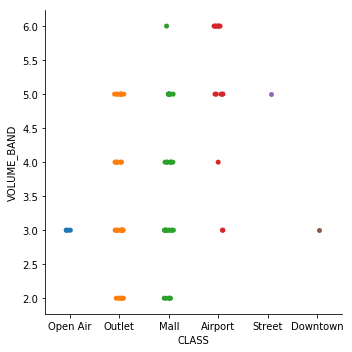

In [23]:
sns.catplot('CLASS', 'VOLUME_BAND', data=fiscal_gb)

In [24]:
fiscal_reset = fiscal_gb.reset_index()
fiscal_reset.head()

,FISCAL_YEAR,STORE,COMP_PCT,CLASS,PAYROLL_PCT,FISCAL_MONTH,STRAK_COMP_TRAFFIC_DELTA,DOLLAR_PER_TRANS,STRAK_CONVERSION_PCT,SALES_AMT_PER_PAY_HOUR,AVG_PAY_PER_HR,SALES_AMT_TY,SALES_AMT_LY,SPECIAL_ORDER_PCT_TO_SLS,VOLUME_BAND,NUM_OF_EMPS,CLOSE_DATE,WEEK_END_DATE
0,2017,1549,0.622171,Open Air,0.098938,4,0.449455,218.524340,0.172716,172.888342,17.105240,23163.58,14279.370,0.228219,3,3.0,NaN,07-MAY-16
1,2017,2079,0.532088,Outlet,0.086585,2,0.377591,158.663143,0.154497,216.990075,18.787981,27766.05,18123.010,0.072788,4,4.0,NaN,05-MAR-16
2,2017,2076,0.619768,Outlet,0.094664,3,0.413081,192.647905,0.206687,168.090660,15.912166,20228.03,12488.230,0.082990,2,4.0,NaN,09-APR-16
3,2017,2063,0.502911,Outlet,0.089197,5,0.387339,150.668783,0.115572,202.592487,18.070717,28476.40,18947.490,0.100516,3,3.0,NaN,04-JUN-16
4,2017,2057,0.693734,Outlet,0.090021,10,0.562145,154.020186,0.131588,281.899563,25.677232,32245.61,19275.845,0.125684,3,2.5,NaN,26-NOV-16


In [25]:
fiscal_reset['WEEK_END_DATE'] = pd.to_datetime(fiscal_reset['WEEK_END_DATE'])
fiscal_reset.head()

,FISCAL_YEAR,STORE,COMP_PCT,CLASS,PAYROLL_PCT,FISCAL_MONTH,STRAK_COMP_TRAFFIC_DELTA,DOLLAR_PER_TRANS,STRAK_CONVERSION_PCT,SALES_AMT_PER_PAY_HOUR,AVG_PAY_PER_HR,SALES_AMT_TY,SALES_AMT_LY,SPECIAL_ORDER_PCT_TO_SLS,VOLUME_BAND,NUM_OF_EMPS,CLOSE_DATE,WEEK_END_DATE
0,2017,1549,0.622171,Open Air,0.098938,4,0.449455,218.524340,0.172716,172.888342,17.105240,23163.58,14279.370,0.228219,3,3.0,NaN,2016-05-07
1,2017,2079,0.532088,Outlet,0.086585,2,0.377591,158.663143,0.154497,216.990075,18.787981,27766.05,18123.010,0.072788,4,4.0,NaN,2016-03-05
2,2017,2076,0.619768,Outlet,0.094664,3,0.413081,192.647905,0.206687,168.090660,15.912166,20228.03,12488.230,0.082990,2,4.0,NaN,2016-04-09
3,2017,2063,0.502911,Outlet,0.089197,5,0.387339,150.668783,0.115572,202.592487,18.070717,28476.40,18947.490,0.100516,3,3.0,NaN,2016-06-04
4,2017,2057,0.693734,Outlet,0.090021,10,0.562145,154.020186,0.131588,281.899563,25.677232,32245.61,19275.845,0.125684,3,2.5,NaN,2016-11-26


### EXPLORE POSSIBLE SIGNIFICANCE OF DIFFERENCE BTWN COMP_PCT and STRAK_COMP_TIME_DELTA

In [26]:
fiscal_reset['COMP_STRAK_DIFF'] = fiscal_reset['COMP_PCT'] - fiscal_reset['STRAK_COMP_TRAFFIC_DELTA']
fy = fiscal_reset.sort_values(by = 'FISCAL_YEAR')
fy.head()

,FISCAL_YEAR,STORE,COMP_PCT,CLASS,PAYROLL_PCT,FISCAL_MONTH,STRAK_COMP_TRAFFIC_DELTA,DOLLAR_PER_TRANS,STRAK_CONVERSION_PCT,SALES_AMT_PER_PAY_HOUR,AVG_PAY_PER_HR,SALES_AMT_TY,SALES_AMT_LY,SPECIAL_ORDER_PCT_TO_SLS,VOLUME_BAND,NUM_OF_EMPS,CLOSE_DATE,WEEK_END_DATE,COMP_STRAK_DIFF
0,2017,1549,0.622171,Open Air,0.098938,4,0.449455,218.524340,0.172716,172.888342,17.105240,23163.58,14279.37,0.228219,3,3.0,NaN,2016-05-07,0.172716
21,2017,1722,0.600705,Airport,0.091187,2,0.504924,190.425171,0.095781,194.590745,17.744065,50081.82,31287.36,0.085815,6,9.0,NaN,2016-03-12,0.095781
20,2017,1627,0.511607,Mall,0.099311,2,0.351563,199.274831,0.160044,211.156879,20.970277,23514.43,15555.91,0.246000,3,3.0,NaN,2016-03-05,0.160044
19,2017,1652,0.602982,Mall,0.097134,9,0.475843,231.685385,0.127139,210.939170,20.489445,21083.37,13152.59,0.185582,2,4.0,27-MAR-19,2016-10-01,0.127139
18,2017,1664,0.854406,Mall,0.062397,3,0.711694,208.683186,0.142712,206.961559,12.913727,23581.20,12716.31,0.153083,4,4.0,NaN,2016-04-09,0.142712


### QUERY DIFFERENT CLASS TYPES AND COMP_PCT

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEBB4E9278>,
      dtype=object)

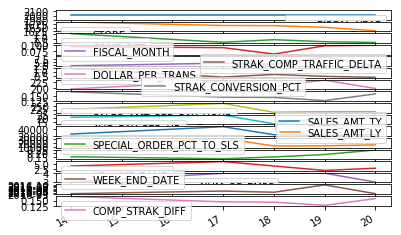

In [27]:
fy_2017 = fy.query('FISCAL_YEAR == "2017" & CLASS == "Mall"')
fy_2017.head(5).plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEC7143F28>,
      dtype=object)

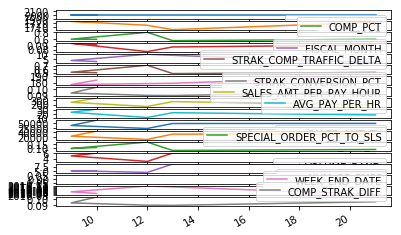

In [37]:
fy_2017 = fy.query('FISCAL_YEAR == "2017" & CLASS == "Airport"')
fy_2017.head(5).plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEC8856B38>,
      dtype=object)

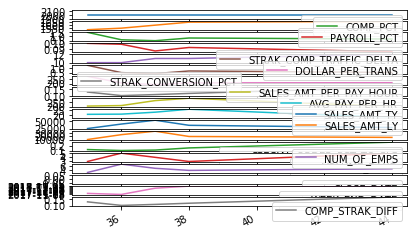

In [39]:
fy_2018= fy.query('FISCAL_YEAR == "2018"')
fy_2018.head(5).plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEC5776780>,
      dtype=object)

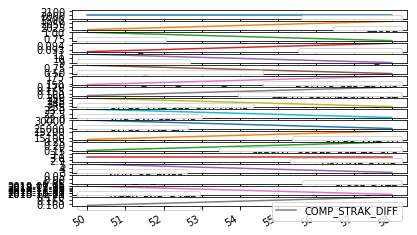

In [30]:
fy_2019 = fy.query('FISCAL_YEAR == "2019" & CLASS == "Outlet"')
fy_2019.head(2).plot(subplots=True)

In [31]:
fy_2020 = fy.query('FISCAL_YEAR == "2020"')
fy_2020.head(2)

,FISCAL_YEAR,STORE,COMP_PCT,CLASS,PAYROLL_PCT,FISCAL_MONTH,STRAK_COMP_TRAFFIC_DELTA,DOLLAR_PER_TRANS,STRAK_CONVERSION_PCT,SALES_AMT_PER_PAY_HOUR,AVG_PAY_PER_HR,SALES_AMT_TY,SALES_AMT_LY,SPECIAL_ORDER_PCT_TO_SLS,VOLUME_BAND,NUM_OF_EMPS,CLOSE_DATE,WEEK_END_DATE,COMP_STRAK_DIFF
85,2020,2074,0.547126,Outlet,0.094062,3,0.369883,131.718959,0.177243,224.33639,21.101495,29109.890,18815.460,0.245765,2,4.0,NaN,2019-04-20,0.177243
84,2020,1649,0.916490,Open Air,0.092302,3,0.777540,213.122027,0.138950,214.66489,19.646251,28388.695,14681.675,0.080111,3,4.0,NaN,2019-04-27,0.138950


In [32]:
fy_cl = fy.STORE.value_counts()
fy_cl

2046    4
2019    3
1666    3
2085    3
1722    3
1662    3
2009    3
1649    3
1521    2
1547    2
1724    2
2001    2
1718    2
2063    2
2079    2
1598    2
1715    2
2022    2
1687    1
1701    1
2084    1
2076    1
1690    1
2064    1
2041    1
2029    1
1685    1
1805    1
1834    1
2068    1
       ..
1808    1
1549    1
2057    1
1670    1
2073    1
1665    1
1705    1
1843    1
1710    1
1839    1
1642    1
1726    1
1846    1
1823    1
2012    1
1627    1
2007    1
2005    1
2036    1
2002    1
1838    1
2074    1
1650    1
1723    1
1652    1
1660    1
1844    1
1597    1
1712    1
1664    1
Name: STORE, Length: 61, dtype: int64

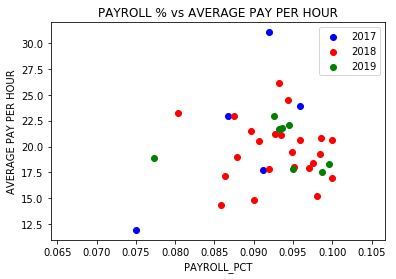

In [42]:
plt.scatter(fy_2017['PAYROLL_PCT'], fy_2017['AVG_PAY_PER_HR'], color="blue")
plt.scatter(fy_2018['PAYROLL_PCT'], fy_2018['AVG_PAY_PER_HR'], color="red")
plt.scatter(fy_2019['PAYROLL_PCT'], fy_2019['AVG_PAY_PER_HR'], color="green")
plt.xlabel("PAYROLL_PCT")
plt.ylabel("AVERAGE PAY PER HOUR")
plt.title('PAYROLL % vs AVERAGE PAY PER HOUR')
plt.legend(labels=['2017', '2018', '2019'])
plt.show()

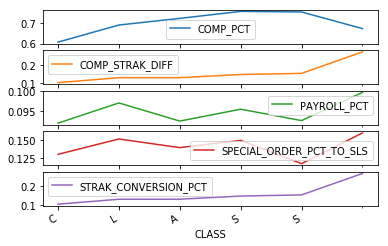

In [82]:
table = pd.pivot_table(fy, values=['COMP_PCT', 'COMP_STRAK_DIFF', 'SPECIAL_ORDER_PCT_TO_SLS', 'PAYROLL_PCT', 'STRAK_CONVERSION_PCT'], index=['CLASS'],
                     aggfunc={'COMP_PCT': 'mean',
                             'COMP_STRAK_DIFF': 'mean',
                              'SPECIAL_ORDER_PCT_TO_SLS': 'mean',
                             'PAYROLL_PCT': 'mean',
                             'STRAK_CONVERSION_PCT':"mean"})
                              



table.plot(kind='line', subplots=True)
 
plt.title('')
plt.ylabel('')
plt.xlabel('CLASS')
plt.xticks(np.arange(5), ('CLASS')) 
plt.show() 
plt.rcParams["figure.figsize"] = (20,20)

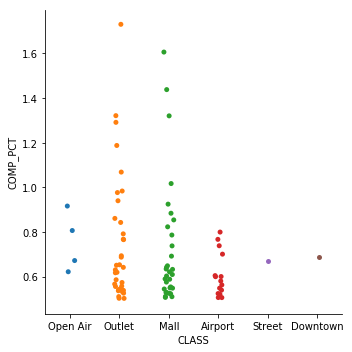

In [44]:
sns.catplot(x='CLASS', y='COMP_PCT', data=fiscal_reset)

In [45]:
fiscal_reset.STORE.value_counts().head()

2046    4
2009    3
1666    3
2085    3
1649    3
Name: STORE, dtype: int64

In [46]:

top_40 = fiscal_reset.nlargest(40, columns='COMP_PCT')
top_40.sort_values(by = 'WEEK_END_DATE').head()

,FISCAL_YEAR,STORE,COMP_PCT,CLASS,PAYROLL_PCT,FISCAL_MONTH,STRAK_COMP_TRAFFIC_DELTA,DOLLAR_PER_TRANS,STRAK_CONVERSION_PCT,SALES_AMT_PER_PAY_HOUR,AVG_PAY_PER_HR,SALES_AMT_TY,SALES_AMT_LY,SPECIAL_ORDER_PCT_TO_SLS,VOLUME_BAND,NUM_OF_EMPS,CLOSE_DATE,WEEK_END_DATE,COMP_STRAK_DIFF
14,2017,1690,1.606306,Mall,0.093181,2,1.436093,197.138615,0.170213,227.118220,21.163063,25628.02,9833.08,0.155385,4,3.0,NaN,2016-03-05,0.170213
15,2017,1670,0.671797,Street,0.099698,2,0.403032,230.170397,0.268765,218.886295,21.822439,63757.20,38136.93,0.159778,5,9.0,30-JAN-19,2016-03-12,0.268765
5,2017,2046,1.321433,Outlet,0.092224,2,1.196518,214.089172,0.124915,241.493034,22.271430,64654.93,27851.30,0.028421,5,5.0,NaN,2016-03-26,0.124915
16,2017,1666,1.320526,Mall,0.091764,2,1.235929,210.808918,0.084597,297.995701,27.345235,40896.93,17623.99,0.025699,3,4.0,NaN,2016-03-26,0.084597
18,2017,1664,0.854406,Mall,0.062397,3,0.711694,208.683186,0.142712,206.961559,12.913727,23581.20,12716.31,0.153083,4,4.0,NaN,2016-04-09,0.142712


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEC90C58D0>],
      dtype=object)

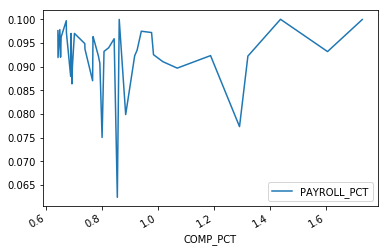

In [47]:
top_40.plot(x='COMP_PCT',  y='PAYROLL_PCT',subplots=True)

In [48]:
fiscal_years = fiscal_reset[
     (fiscal_reset.STORE.isin([1662,
1718,
1649,
2046,
2019,
1722,
1724,
1823,
2009,
2085,
1666]))
 ]
fiscal_years = fiscal_years.sort_values(by='STORE')
fiscal_years

,FISCAL_YEAR,STORE,COMP_PCT,CLASS,PAYROLL_PCT,FISCAL_MONTH,STRAK_COMP_TRAFFIC_DELTA,DOLLAR_PER_TRANS,STRAK_CONVERSION_PCT,SALES_AMT_PER_PAY_HOUR,AVG_PAY_PER_HR,SALES_AMT_TY,SALES_AMT_LY,SPECIAL_ORDER_PCT_TO_SLS,VOLUME_BAND,NUM_OF_EMPS,CLOSE_DATE,WEEK_END_DATE,COMP_STRAK_DIFF
66,2019,1649,0.672335,Open Air,0.097155,8,0.514251,198.540763,0.158084,180.867830,17.572145,23427.8100,14009.0400,0.134783,3,5.00,NaN,2018-09-29,0.158084
84,2020,1649,0.916490,Open Air,0.092302,3,0.777540,213.122027,0.138950,214.664890,19.646251,28388.6950,14681.6750,0.080111,3,4.00,NaN,2019-04-27,0.138950
38,2018,1649,0.806822,Open Air,0.093213,11,0.688172,209.977575,0.118650,286.105193,26.137739,36427.3200,19699.9750,0.154622,3,4.00,NaN,2017-12-30,0.118650
68,2019,1662,0.786655,Mall,0.092260,9,0.610260,240.158639,0.176395,201.402111,18.524548,28718.3800,16331.2200,0.158168,5,6.00,NaN,2018-08-25,0.176395
80,2020,1662,0.510457,Mall,0.090325,1,0.343346,220.253526,0.167111,227.200622,20.521854,34359.5500,22747.7800,0.135280,5,7.00,NaN,2019-02-16,0.167111
44,2018,1662,0.692137,Mall,0.086361,12,0.525597,211.936814,0.166540,201.036468,17.124102,28546.0625,16898.9925,0.268131,5,4.75,NaN,2017-12-30,0.166540
40,2018,1666,0.550033,Mall,0.089992,9,0.459553,202.049596,0.090480,164.958849,14.844961,20002.9100,12904.8300,0.053790,3,4.00,NaN,2017-10-07,0.090480
16,2017,1666,1.320526,Mall,0.091764,2,1.235929,210.808918,0.084597,297.995701,27.345235,40896.9300,17623.9900,0.025699,3,4.00,NaN,2016-03-26,0.084597
69,2019,1666,0.738053,Mall,0.094865,2,0.646835,234.864384,0.091218,251.523509,23.860779,34290.2000,19729.0900,0.048351,3,4.00,NaN,2018-03-31,0.091218
59,2019,1718,0.524489,Airport,0.096649,3,0.413053,168.447875,0.111436,214.071962,20.689913,40427.4900,26518.7100,0.138790,5,7.00,NaN,2018-04-21,0.111436


### GRAPH VARIOUS METRICS FOR COMPARISON

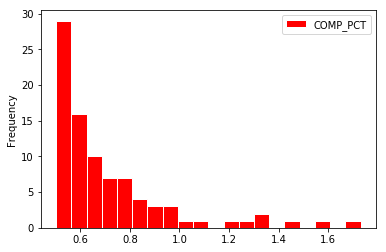

In [49]:
fiscal_reset.plot(x='FISCAL_YEAR', y='COMP_PCT', kind='hist', bins=20, ec='white', color='red')
#fiscal_years.plot(x='index', y='VOLUME_BAND', kind='scatter')

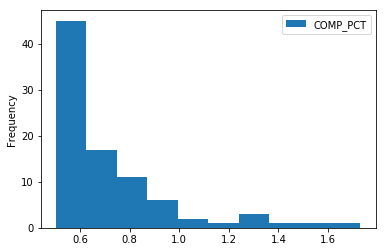

In [51]:
fiscal_reset.plot(x='STORE', y='COMP_PCT', kind='hist')


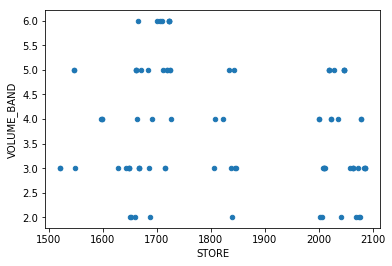

In [52]:
fy.plot(x='STORE', y='VOLUME_BAND', kind='scatter')

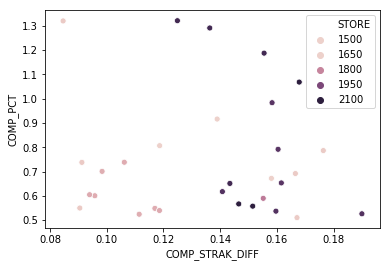

In [53]:
sns.scatterplot(x=fiscal_years['COMP_STRAK_DIFF'], y=fiscal_years['COMP_PCT'], hue=fiscal_years['STORE'])
#sns.scatterplot(data=fiscal_years)

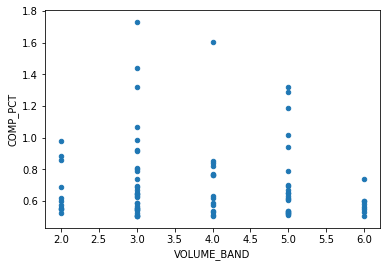

In [54]:
fy.plot(x='VOLUME_BAND', y='COMP_PCT', kind='scatter')

C:\Users\tamsc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


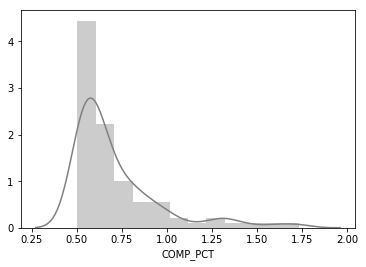

In [55]:
x = pd.Series(fy['COMP_PCT'])
ax = sns.distplot(x, color='grey')
ax

In [56]:
fy.query('VOLUME_BAND == "6"').head()


,FISCAL_YEAR,STORE,COMP_PCT,CLASS,PAYROLL_PCT,FISCAL_MONTH,STRAK_COMP_TRAFFIC_DELTA,DOLLAR_PER_TRANS,STRAK_CONVERSION_PCT,SALES_AMT_PER_PAY_HOUR,AVG_PAY_PER_HR,SALES_AMT_TY,SALES_AMT_LY,SPECIAL_ORDER_PCT_TO_SLS,VOLUME_BAND,NUM_OF_EMPS,CLOSE_DATE,WEEK_END_DATE,COMP_STRAK_DIFF
21,2017,1722,0.600705,Airport,0.091187,2,0.504924,190.425171,0.095781,194.590745,17.744065,50081.82,31287.36,0.085815,6,9.0,NaN,2016-03-12,0.095781
17,2017,1665,0.529278,Mall,0.089347,4,0.385178,226.912103,0.144100,267.691235,23.917475,48559.19,31753.01,0.128188,6,4.0,NaN,2016-05-07,0.144100
13,2017,1705,0.563123,Airport,0.086722,9,0.473076,178.709856,0.090047,264.804911,22.964534,49502.63,31669.05,0.074483,6,9.0,NaN,2016-10-22,0.090047
10,2017,1723,0.600069,Airport,0.091895,3,0.496890,183.944196,0.103179,337.858566,31.047645,67507.52,42190.37,0.109192,6,5.0,NaN,2016-04-09,0.103179
43,2018,1722,0.548651,Airport,0.095126,9,0.431673,165.510248,0.116978,189.246604,18.002230,46673.89,30138.42,0.040836,6,11.0,NaN,2017-10-07,0.116978


### CORRELATION HEATMAP

In [57]:
store_corr = fy.corr(method='pearson')
store_corr

,FISCAL_YEAR,STORE,COMP_PCT,PAYROLL_PCT,FISCAL_MONTH,STRAK_COMP_TRAFFIC_DELTA,DOLLAR_PER_TRANS,STRAK_CONVERSION_PCT,SALES_AMT_PER_PAY_HOUR,AVG_PAY_PER_HR,SALES_AMT_TY,SALES_AMT_LY,SPECIAL_ORDER_PCT_TO_SLS,VOLUME_BAND,NUM_OF_EMPS,COMP_STRAK_DIFF
FISCAL_YEAR,1.000000,0.091377,0.020319,0.153107,-0.040128,0.009842,-0.143189,0.077822,0.042345,0.088546,-0.023069,-0.030405,0.035102,-0.100670,0.144463,0.077822
STORE,0.091377,1.000000,0.064876,-0.026427,-0.166468,0.022477,-0.655447,0.316350,-0.164761,-0.177091,-0.169455,-0.218886,-0.145931,-0.197962,-0.068423,0.316350
COMP_PCT,0.020319,0.064876,1.000000,-0.038276,-0.167378,0.991276,-0.009749,-0.015474,0.046623,0.031531,0.028679,-0.271053,-0.180056,-0.065899,-0.087441,-0.015474
PAYROLL_PCT,0.153107,-0.026427,-0.038276,1.000000,0.114650,-0.041684,0.012765,0.028981,-0.146884,0.224148,-0.080155,-0.055968,0.060050,-0.208087,0.036035,0.028981
FISCAL_MONTH,-0.040128,-0.166468,-0.167378,0.114650,1.000000,-0.132468,0.193550,-0.251166,-0.093885,-0.049789,-0.105335,-0.043221,0.250803,-0.050659,-0.009437,-0.251166
STRAK_COMP_TRAFFIC_DELTA,0.009842,0.022477,0.991276,-0.041684,-0.132468,1.000000,-0.001419,-0.147124,0.062315,0.047146,0.051229,-0.245912,-0.198814,-0.040064,-0.078736,-0.147124
DOLLAR_PER_TRANS,-0.143189,-0.655447,-0.009749,0.012765,0.193550,-0.001419,1.000000,-0.062404,0.179750,0.187829,0.018561,0.020123,0.077933,0.010643,-0.027739,-0.062404
STRAK_CONVERSION_PCT,0.077822,0.316350,-0.015474,0.028981,-0.251166,-0.147124,-0.062404,1.000000,-0.122848,-0.121035,-0.173411,-0.168591,0.157006,-0.190609,-0.058897,1.000000
SALES_AMT_PER_PAY_HOUR,0.042345,-0.164761,0.046623,-0.146884,-0.093885,0.062315,0.179750,-0.122848,1.000000,0.929010,0.525138,0.513808,0.019256,0.321007,0.154244,-0.122848
AVG_PAY_PER_HR,0.088546,-0.177091,0.031531,0.224148,-0.049789,0.047146,0.187829,-0.121035,0.929010,1.000000,0.484090,0.482185,0.040189,0.238512,0.161744,-0.121035


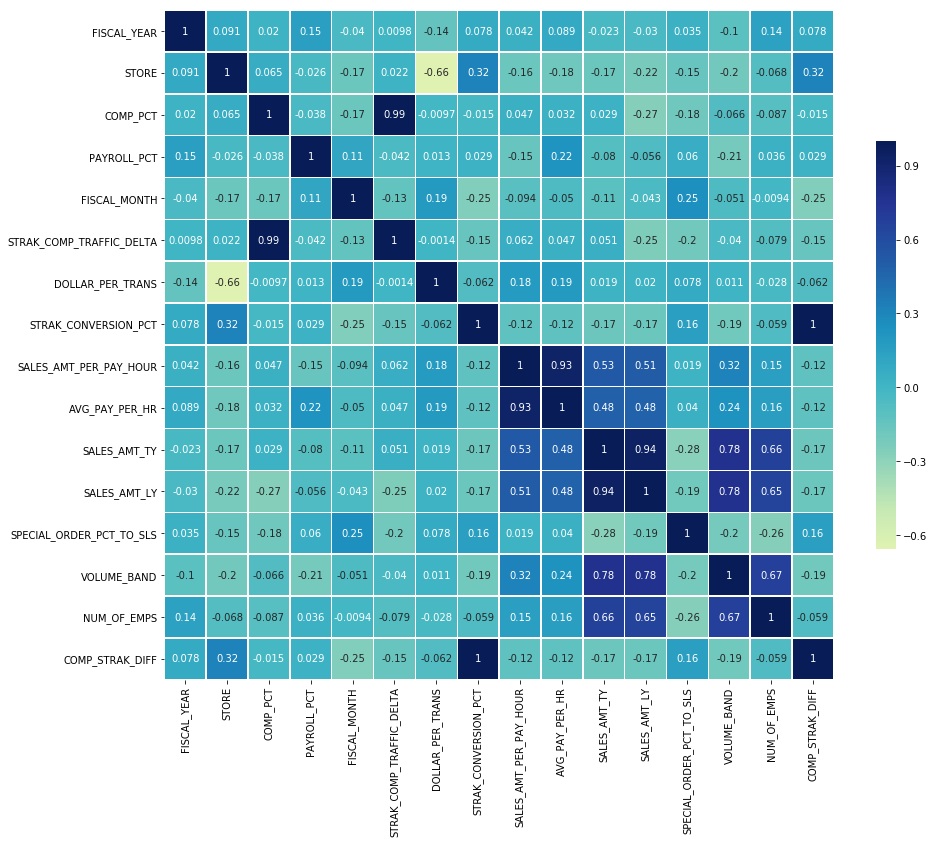

In [58]:
fig, ax = plt.subplots(figsize=(15, 15))

corr = store_corr

sns.heatmap(corr, cmap='YlGnBu', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [59]:
fy[['WEEK_END_DATE', 'FISCAL_YEAR', 'STORE', 'COMP_PCT', 'STRAK_COMP_TRAFFIC_DELTA', 'STRAK_CONVERSION_PCT','PAYROLL_PCT', 'FISCAL_MONTH', 'STRAK_COMP_TRAFFIC_DELTA', 'DOLLAR_PER_TRANS', 'SALES_AMT_PER_PAY_HOUR', 'AVG_PAY_PER_HR', 'SALES_AMT_TY',
    'SALES_AMT_LY', 'SPECIAL_ORDER_PCT_TO_SLS', 'VOLUME_BAND', 'NUM_OF_EMPS', 'CLOSE_DATE', 'COMP_STRAK_DIFF']]


df_acc = fy.sort_values(by = 'WEEK_END_DATE')
df_acc


,FISCAL_YEAR,STORE,COMP_PCT,CLASS,PAYROLL_PCT,FISCAL_MONTH,STRAK_COMP_TRAFFIC_DELTA,DOLLAR_PER_TRANS,STRAK_CONVERSION_PCT,SALES_AMT_PER_PAY_HOUR,AVG_PAY_PER_HR,SALES_AMT_TY,SALES_AMT_LY,SPECIAL_ORDER_PCT_TO_SLS,VOLUME_BAND,NUM_OF_EMPS,CLOSE_DATE,WEEK_END_DATE,COMP_STRAK_DIFF
6,2017,2019,0.617624,Outlet,0.077954,2,0.476839,168.770958,0.140785,195.593804,15.017017,28022.015,17571.415,0.111358,5,3.0,NaN,2016-02-27,0.140785
20,2017,1627,0.511607,Mall,0.099311,2,0.351563,199.274831,0.160044,211.156879,20.970277,23514.430,15555.910,0.246000,3,3.0,NaN,2016-03-05,0.160044
1,2017,2079,0.532088,Outlet,0.086585,2,0.377591,158.663143,0.154497,216.990075,18.787981,27766.050,18123.010,0.072788,4,4.0,NaN,2016-03-05,0.154497
14,2017,1690,1.606306,Mall,0.093181,2,1.436093,197.138615,0.170213,227.118220,21.163063,25628.020,9833.080,0.155385,4,3.0,NaN,2016-03-05,0.170213
21,2017,1722,0.600705,Airport,0.091187,2,0.504924,190.425171,0.095781,194.590745,17.744065,50081.820,31287.360,0.085815,6,9.0,NaN,2016-03-12,0.095781
15,2017,1670,0.671797,Street,0.099698,2,0.403032,230.170397,0.268765,218.886295,21.822439,63757.200,38136.930,0.159778,5,9.0,30-JAN-19,2016-03-12,0.268765
5,2017,2046,1.321433,Outlet,0.092224,2,1.196518,214.089172,0.124915,241.493034,22.271430,64654.930,27851.300,0.028421,5,5.0,NaN,2016-03-26,0.124915
16,2017,1666,1.320526,Mall,0.091764,2,1.235929,210.808918,0.084597,297.995701,27.345235,40896.930,17623.990,0.025699,3,4.0,NaN,2016-03-26,0.084597
10,2017,1723,0.600069,Airport,0.091895,3,0.496890,183.944196,0.103179,337.858566,31.047645,67507.520,42190.370,0.109192,6,5.0,NaN,2016-04-09,0.103179
18,2017,1664,0.854406,Mall,0.062397,3,0.711694,208.683186,0.142712,206.961559,12.913727,23581.200,12716.310,0.153083,4,4.0,NaN,2016-04-09,0.142712


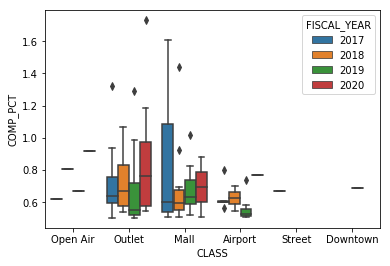

In [60]:
sns.boxplot(x="CLASS", y="COMP_PCT", hue="FISCAL_YEAR",
            data=fiscal_reset);


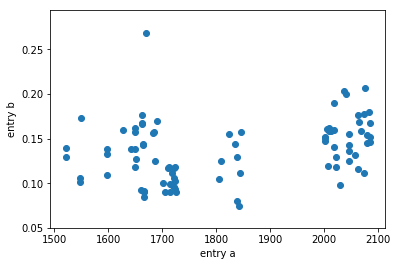

In [61]:
plt.scatter('STORE', 'COMP_STRAK_DIFF', data=df_acc)
plt.xlabel('entry a')
plt.ylabel('entry b')
cmap=plt.get_cmap('gist_earth')
plt.plot(figsize = (10, 10))
plt.show()

In [62]:
df_acc.COMP_PCT.max()

1.7306139999999999

### CLOSED STORES

In [63]:
closed_stores = df.groupby('STORE')['CLOSE_DATE'].value_counts(normalize=True)
closed_stores

STORE  CLOSE_DATE
1643   31-DEC-17     1.0
1652   27-MAR-19     1.0
1670   30-JAN-19     1.0
1711   01-APR-19     1.0
1717   30-MAR-19     1.0
1803   29-MAY-19     1.0
1820   17-SEP-17     1.0
1832   30-JAN-19     1.0
2065   01-JUN-16     1.0
Name: CLOSE_DATE, dtype: float64

In [65]:
store_closed = df.query('STORE == "1643" | STORE == "1652" | STORE == "1711" | STORE == "1717" | STORE == "1803" | STORE == "1820" | STORE == "2065"')
store_closed.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
3622,7,1643,19-MAR-16,2017,7,2,13687.47,12552.18,0.090446,2016,7,2,21-MAR-15,450.15,0.00,80,7,1057,88.85,13687.47,97,51,87,103,0.5544,0.8447,0.6995,92,2476.38,175,13687.47,71,11632.63,18,2689.76,88.86,1378.88,104,2054.84,46,487.6,4,138.5,0,0.00,7,448.74,1,42.00,12,684.00,34,254.0,0,...,1,9,7,0,2,2,0,98,9,9,85,0.032888,0.000000,0.091769,12.949357,141.107938,11.896455,-0.001323,2.058824,161.029059,0.253521,0.180923,0.405714,0.594286,0.012785,163.839859,19.758077,0.849874,0.150126,0.231225,0.100740,15.517443,154.034099,0,0,0.0,1,5,5.0,0,0,0.0,1,-1,-1.0,2,4,2,BATON ROUGE,Mall,31-DEC-17,943,01-OCT-97,1
3623,7,1643,26-MAR-16,2017,8,2,9846.85,11274.51,-0.126627,2016,8,2,28-MAR-15,802.16,0.00,115,7,1066,118.47,9846.85,84,28,73,86,0.4444,0.8488,0.6466,63,1041.88,143,9846.85,53,7677.52,10,1134.88,118.45,1609.91,90,2169.33,30,303.6,1,25.0,1,198.00,13,785.73,0,0.00,10,635.00,35,222.0,0,...,5,5,3,1,1,3,0,89,5,5,71,0.081464,0.000000,0.078799,9.237195,117.224405,8.998059,-0.205426,2.014085,138.688028,0.188679,0.105808,0.370629,0.629371,0.014522,144.858868,24.103667,0.779693,0.220307,0.147819,0.163495,13.591473,83.130857,0,0,0.0,1,12,12.0,0,0,0.0,1,6,6.0,2,18,9,BATON ROUGE,Mall,31-DEC-17,943,01-OCT-97,1
3624,7,1643,02-APR-16,2017,9,3,10259.90,16689.45,-0.385246,2016,9,3,04-APR-15,437.66,800.25,101,6,882,100.92,10259.90,67,21,68,76,0.3962,0.8947,0.6455,53,1575.97,136,10259.90,52,7918.59,20,3046.88,100.91,1371.37,84,2341.31,43,464.3,0,0.0,2,446.00,18,1105.50,-1,-325.00,8,576.00,15,174.5,0,...,3,6,3,0,3,0,0,70,6,6,58,0.042657,0.047949,0.075964,11.632540,153.132836,8.739596,-0.461210,2.344828,176.894828,0.384615,0.153605,0.382353,0.617647,0.013255,152.280577,27.872738,0.771800,0.228200,0.384776,0.133663,13.590031,101.673769,0,0,0.0,1,19,19.0,0,0,0.0,1,13,13.0,2,32,16,BATON ROUGE,Mall,31-DEC-17,943,01-OCT-97,1
3625,7,1643,09-APR-16,2017,10,3,8516.36,10056.39,-0.153139,2016,10,3,11-APR-15,614.60,603.25,77,7,779,96.92,8516.36,63,37,59,69,0.6271,0.8551,0.7411,59,919.99,126,8516.36,42,6431.37,12,1661.09,96.91,1120.06,84,2084.99,47,498.3,1,25.0,1,248.00,6,365.50,2,71.99,13,713.20,14,163.0,

In [66]:
closed_store_gb = store_closed.groupby(['WEEK_END_DATE', 'STORE']).agg({'COMP_PCT': 'mean', 'TY_MARK_DOWN_PCT': 'mean','SPECIAL_ORDER_PCT_TO_SLS': 'mean', 'STRAK_CONVERSION_PCT': 'mean',
                                                                    'FOOTWEAR_UNITS_PCT': 'mean', 'NONFOOTWEAR_UNITS_PCT': 'mean', 'PAYROLL_PCT': 'mean'})
closed_store_gb = closed_store_gb.reset_index()
closed_store_gb.head()

,WEEK_END_DATE,STORE,COMP_PCT,TY_MARK_DOWN_PCT,SPECIAL_ORDER_PCT_TO_SLS,STRAK_CONVERSION_PCT,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,PAYROLL_PCT
0,01-APR-17,1643,-0.387556,0.102330,0.175536,0.087344,0.397590,0.602410,0.175870
1,01-APR-17,1652,0.195166,0.029974,0.164384,0.135616,0.364035,0.635965,0.112758
2,01-APR-17,1711,-0.016058,0.094440,0.031813,0.073609,0.171642,0.828358,0.298195
3,01-APR-17,1717,-0.208977,0.101698,0.034589,0.112591,0.125654,0.874346,0.155217
4,01-APR-17,1803,-0.064151,0.048081,0.080596,0.142268,0.237624,0.762376,0.149312


In [67]:
closed_store_gb['WEEK_END_DATE'] = pd.to_datetime(closed_store_gb['WEEK_END_DATE'])
closed_store_gb
closed_store = closed_store_gb.set_index('WEEK_END_DATE').sort_values(by='WEEK_END_DATE')
cs_gb=closed_store_gb.nlargest(500, columns='COMP_PCT')
cs_gb = cs_gb.set_index(['STORE']).sort_values(by='STORE')
cs_gb

,WEEK_END_DATE,COMP_PCT,TY_MARK_DOWN_PCT,SPECIAL_ORDER_PCT_TO_SLS,STRAK_CONVERSION_PCT,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,PAYROLL_PCT
STORE,,,,,,,,
1643,2016-09-03,0.100876,0.025666,0.074929,0.101246,0.429688,0.570313,0.228854
1643,2017-05-06,-0.064517,0.034289,0.120357,0.104575,0.352518,0.647482,0.128175
1643,2016-06-04,-0.063863,0.077202,0.166475,0.080420,0.326087,0.673913,0.130949
1643,2017-01-07,0.135343,0.070362,0.334130,0.097077,0.517241,0.482759,0.126026
1643,2017-08-05,-0.059330,0.058552,0.185912,0.072727,0.500000,0.500000,0.170844
1643,2017-06-03,0.136791,0.085294,0.113513,0.095097,0.422764,0.577236,0.122582
1643,2016-08-27,-0.039335,0.025886,0.145734,0.119008,0.347107,0.652893,0.233854
1643,2016-12-17,0.029636,0.070230,0.193845,0.127935,0.359773,0.640227,0.094322
1643,2017-09-16,-0.034891,0.081913,0.125460,0.112583,0.346774,0.653226,0.149201


In [68]:
cs_1652 = cs_gb.loc[1652]
cs_1652.sort_values(by='WEEK_END_DATE')
cs_1652_idx = cs_1652.set_index('WEEK_END_DATE')
cs_reset = cs_1652_idx.reset_index()
cs_reset.head()

,WEEK_END_DATE,COMP_PCT,TY_MARK_DOWN_PCT,SPECIAL_ORDER_PCT_TO_SLS,STRAK_CONVERSION_PCT,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,PAYROLL_PCT
0,2018-11-10,0.108056,0.029101,0.166317,0.131673,0.456250,0.543750,0.119836
1,2018-09-15,0.110055,0.021220,0.082765,0.131833,0.369048,0.630952,0.144301
2,2018-07-14,0.142704,0.062973,0.210147,0.148000,0.377358,0.622642,0.143013
3,2017-01-07,0.108018,0.037911,0.310788,0.110320,0.380000,0.620000,0.204375
4,2018-12-22,0.140377,0.081257,0.184119,0.162487,0.298921,0.701079,0.087423


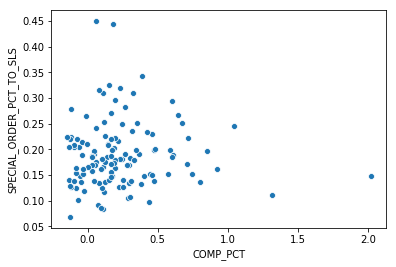

In [69]:
ax = sns.scatterplot(x="COMP_PCT", y="SPECIAL_ORDER_PCT_TO_SLS", data=cs_reset)
ax

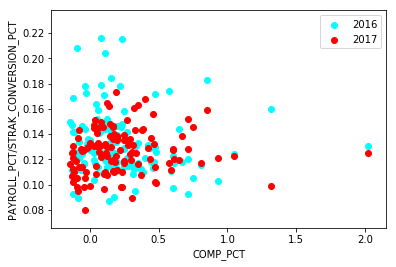

In [70]:
plt.scatter(cs_reset['COMP_PCT'], cs_reset['PAYROLL_PCT'], color="cyan")
plt.scatter(cs_reset['COMP_PCT'], cs_reset['STRAK_CONVERSION_PCT'], color="red")
plt.xlabel("COMP_PCT")
plt.ylabel("PAYROLL_PCT/STRAK_CONVERSION_PCT")
plt.title('')
plt.legend(labels=['2016','2017', '2018', '2019'])
plt.show()

In [72]:
cs_1643 = cs_gb.loc[1643]
cs_1643.head()

,WEEK_END_DATE,COMP_PCT,TY_MARK_DOWN_PCT,SPECIAL_ORDER_PCT_TO_SLS,STRAK_CONVERSION_PCT,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,PAYROLL_PCT
STORE,,,,,,,,
1643,2016-09-03,0.100876,0.025666,0.074929,0.101246,0.429688,0.570313,0.228854
1643,2017-05-06,-0.064517,0.034289,0.120357,0.104575,0.352518,0.647482,0.128175
1643,2016-06-04,-0.063863,0.077202,0.166475,0.080420,0.326087,0.673913,0.130949
1643,2017-01-07,0.135343,0.070362,0.334130,0.097077,0.517241,0.482759,0.126026
1643,2017-08-05,-0.059330,0.058552,0.185912,0.072727,0.500000,0.500000,0.170844


In [74]:
cs_1643_we = cs_1643.sort_values(by='WEEK_END_DATE')
cs_1643_we = cs_1643_we.set_index('WEEK_END_DATE')
cs_1643_we.head()

,COMP_PCT,TY_MARK_DOWN_PCT,SPECIAL_ORDER_PCT_TO_SLS,STRAK_CONVERSION_PCT,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,PAYROLL_PCT
WEEK_END_DATE,,,,,,,
2016-03-19,0.090446,0.032888,0.180923,0.091769,0.405714,0.594286,0.100740
2016-03-26,-0.126627,0.081464,0.105808,0.078799,0.370629,0.629371,0.163495
2016-05-07,0.004363,0.046136,0.120218,0.098266,0.364238,0.635762,0.106494
2016-06-04,-0.063863,0.077202,0.166475,0.080420,0.326087,0.673913,0.130949
2016-08-27,-0.039335,0.025886,0.145734,0.119008,0.347107,0.652893,0.233854


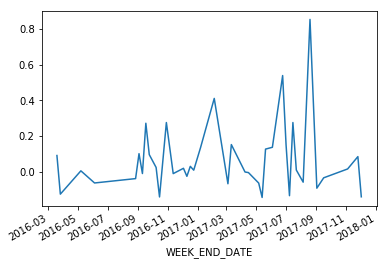

In [75]:
cs_1643_we.COMP_PCT.plot()

In [76]:
cs_1717 = cs_gb.loc[1717]
cs_1717.head(2)

,WEEK_END_DATE,COMP_PCT,TY_MARK_DOWN_PCT,SPECIAL_ORDER_PCT_TO_SLS,STRAK_CONVERSION_PCT,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,PAYROLL_PCT
STORE,,,,,,,,
1717,2018-05-26,0.022198,0.056826,0.025626,0.090909,0.195455,0.804545,0.142012
1717,2017-03-25,0.619331,0.079197,0.032018,0.098729,0.235897,0.764103,0.098863


In [77]:
cs_1717_we = cs_1717.sort_values(by='WEEK_END_DATE')
cs_1717_we = cs_1717.set_index('WEEK_END_DATE')
cs_1717_we.head()

,COMP_PCT,TY_MARK_DOWN_PCT,SPECIAL_ORDER_PCT_TO_SLS,STRAK_CONVERSION_PCT,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,PAYROLL_PCT
WEEK_END_DATE,,,,,,,
2018-05-26,0.022198,0.056826,0.025626,0.090909,0.195455,0.804545,0.142012
2017-03-25,0.619331,0.079197,0.032018,0.098729,0.235897,0.764103,0.098863
2017-01-07,0.019759,0.139392,0.094975,0.081197,0.172185,0.827815,0.257239
2018-03-03,0.027852,0.105916,0.036003,0.084469,0.193277,0.806723,0.214342
2017-08-12,-0.064130,0.075548,0.056216,0.082596,0.154696,0.845304,0.192685


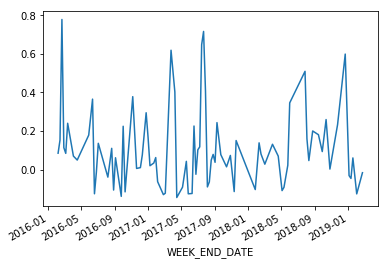

In [78]:
cs_1717 = cs_gb.query('STORE == "1717"')
cs_1717 = cs_1717.set_index('WEEK_END_DATE')
cs_1717.COMP_PCT.plot()

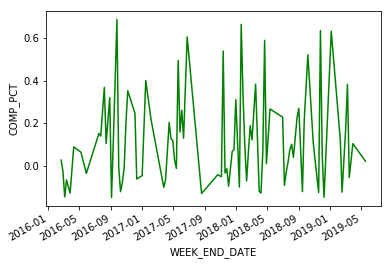

In [79]:
cs_1803 = cs_gb.query('STORE == "1803"')
cs_1803 = cs_1803.set_index('WEEK_END_DATE')
plt.ylabel('COMP_PCT')
cs_1803.COMP_PCT.plot(color='green')

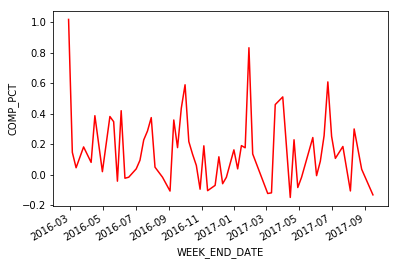

In [80]:
cs_1820 = cs_gb.query('STORE == "1820"')
cs_1820 = cs_1820.set_index('WEEK_END_DATE')
plt.ylabel('COMP_PCT')
cs_1820.COMP_PCT.plot(color='red')